# Analysis Seoul CCTV 
- 서울 구별 CCTV 분석하기

## 1. 데이터 읽기

In [1]:
import pandas as pd

In [3]:

# 파일의 인코딩은 utf-8-sig로 설정한다.
CCTV_Seoul = pd.read_csv("../data/01. Seoul_CCTV.csv", encoding='utf-8-sig')


In [8]:
CCTV_Seoul.head(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [5]:
CCTV_Seoul.tail(3) 

,기관명,소계,2013년도 이전,2014년,2015년,2016년
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [6]:
# 컬럼명 확인

CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: '구별'},inplace=True)

- 0번컬럼을 구별로 변경하고 저장함

In [8]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204


In [9]:

pop_Seoul = pd.read_excel(
    '../data/01. Seoul_Population.xls',  # 엑셀 파일 경로
    header=2,  # 3번째 행부터 데이터 읽기
    usecols='B, D, G, J ,N'  # B, D, G, J, N 열만 읽기
)


- 2번 인덱스 부터 출력 BDGJN컬럼만 출력

In [36]:
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [10]:
pop_Seoul.rename(
    columns={
        pop_Seoul.columns[0] : '구별',
        pop_Seoul.columns[1] : '인구수',
        pop_Seoul.columns[2] : '한국인',
        pop_Seoul.columns[3] : '외국인',
        pop_Seoul.columns[4] : '고령자'
    },
    inplace=True
)

pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


---

## 2. CCTV 데이터 훑어보기

In [11]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [12]:
CCTV_Seoul.tail()

,구별,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [13]:
CCTV_Seoul.sort_values(by='소계', ascending = True). head(5) # true는 디폴트 값 없어도 된다.

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [14]:
CCTV_Seoul['최근증가율'] = (  # 최근증가율 컬럼 생성
    (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
     CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
)

CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(
    5)  # 최근증가율을 기준으로 내림차순 정렬 후 상위 5개 출력


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


## 3. 인구현황 데이터 훑어보기

In [16]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [17]:
pop_Seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,520929,503297,17632,70046
22,서초구,445401,441102,4299,53205
23,강남구,561052,556164,4888,65060
24,송파구,671173,664496,6677,76582
25,강동구,440359,436223,4136,56161


In [18]:
pop_Seoul.drop([0],axis=0, inplace=True) # 합계행 제거

In [19]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [21]:
len(pop_Seoul['구별'].unique()), pop_Seoul['구별'].unique()

(25,
 array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
        '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
        '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object))

In [22]:
# 외국인 비율, 고령자 비율 생성

pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [23]:
pop_Seoul.sort_values(['인구수'], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
23,강남구,561052,556164,4888,65060,0.871220,11.596073
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


- 인구수는 송파구가 제일 많은 것으로 나온다.

In [26]:
pop_Seoul.sort_values(['외국인'], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402024,368550,33474,53981,8.326369,13.427308
17,구로구,441559,410742,30817,58794,6.979135,13.315095
18,금천구,253491,235154,18337,34170,7.233787,13.479769
21,관악구,520929,503297,17632,70046,3.384722,13.446362
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


- 외국인의 수는 영등포구에서 제일 많다.

In [27]:
pop_Seoul.sort_values(['고령자'], ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,671173,664496,6677,76582,0.994825,11.410173
16,강서구,608255,601691,6564,76032,1.079153,12.500021
12,은평구,491202,486794,4408,74559,0.897390,15.178888
11,노원구,558075,554403,3672,74243,0.657976,13.303409
21,관악구,520929,503297,17632,70046,3.384722,13.446362


- 고령자 수는 송파구에서 제일 많다.

## 4. 두 데이터 합치기

---

In [29]:
CCTV_Seoul.head(1)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195


In [30]:
pop_Seoul.head(1)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656


In [31]:

# CCTV_Seoul과 pop_Seoul을 '구별' 컬럼을 기준으로 병합하여 data_result에 저장
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()  # data_result의 상위 5개 데이터 출력


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 년도별 데이터 컬럼 삭제
- del
- drop()

In [32]:
del data_result['2013년도 이전']

In [33]:
del data_result['2014년']

In [34]:
data_result.head(3)

,구별,소계,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651


In [35]:
data_result.drop(['2015년','2016년'], axis=1, inplace=True)

In [36]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 인덱스 변경
- set_index()
- 선택한 컬럼을 데이터 프레임의 인덱스로 지정

In [37]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


#### 상관계수
- corr()
- correlation의 약자
- 상관계수가 0.2 이상인 데이터르 비교

In [38]:
data_result.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


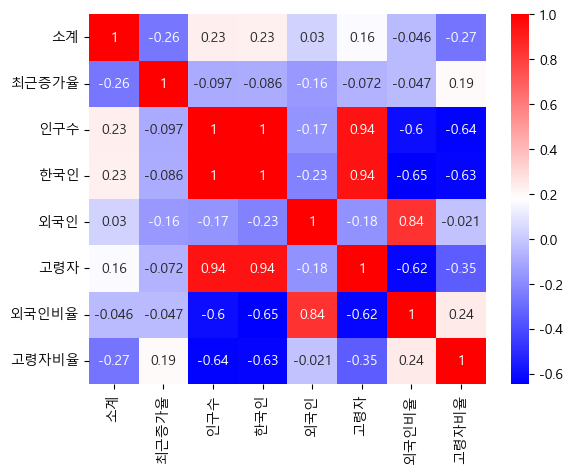

In [41]:
# 데이터프레임의 상관관계를 구하고 히트맵으로 그리기 위해 seaborn 라이브러리를 불러온다.
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

plt.rcParams['axes.unicode_minus'] = False
rc('font', family='Malgun GOthic')
%matplotlib inline

# 데이터프레임의 상관관계를 구한다.
corr = data_result.corr()

# 상관관계를 히트맵으로 그리기 위해 seaborn의 heatmap 함수를 사용한다.
# cmap 파라미터를 이용하여 색상을 blue, white, red 순서로 지정한다.
sns.heatmap(corr, cmap='bwr',annot=True);

In [42]:
data_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   소계      25 non-null     int64  
 1   최근증가율   25 non-null     float64
 2   인구수     25 non-null     int64  
 3   한국인     25 non-null     int64  
 4   외국인     25 non-null     int64  
 5   고령자     25 non-null     int64  
 6   외국인비율   25 non-null     float64
 7   고령자비율   25 non-null     float64
dtypes: float64(3), int64(5)
memory usage: 1.8+ KB


In [43]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수']
data_result['CCTV비율'] = data_result['CCTV비율'] * 100

In [44]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [45]:
data_result.sort_values(by='CCTV비율', ascending=True).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833


- CCTV 비율은 강서구 가장 낮은 것으로 나온다.

In [46]:
data_result.sort_values(by='CCTV비율', ascending=False).head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


- CCTV 비율이 가장 높은 구는 종로구로 강서구에 비해 6~7배 더 높은 것으로 나온다.

---

## 5. 데이터 시각화

In [52]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 소계 컬럼 시각화

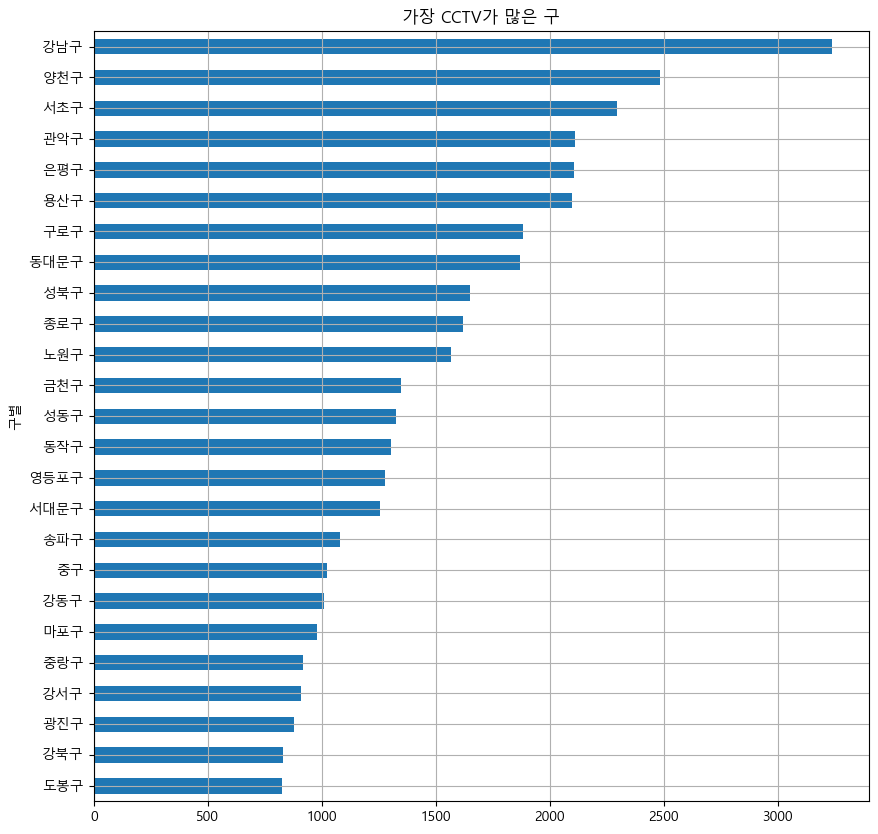

In [53]:
def drawGraph():
    data_result['소계'].sort_values().plot(
        kind='barh', grid=True,title='가장 CCTV가 많은 구', figsize=(10,10));
    
drawGraph() # 정렬, 제목

- CCTV가 가장 많은 구는 강남구로 나온다.

In [54]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


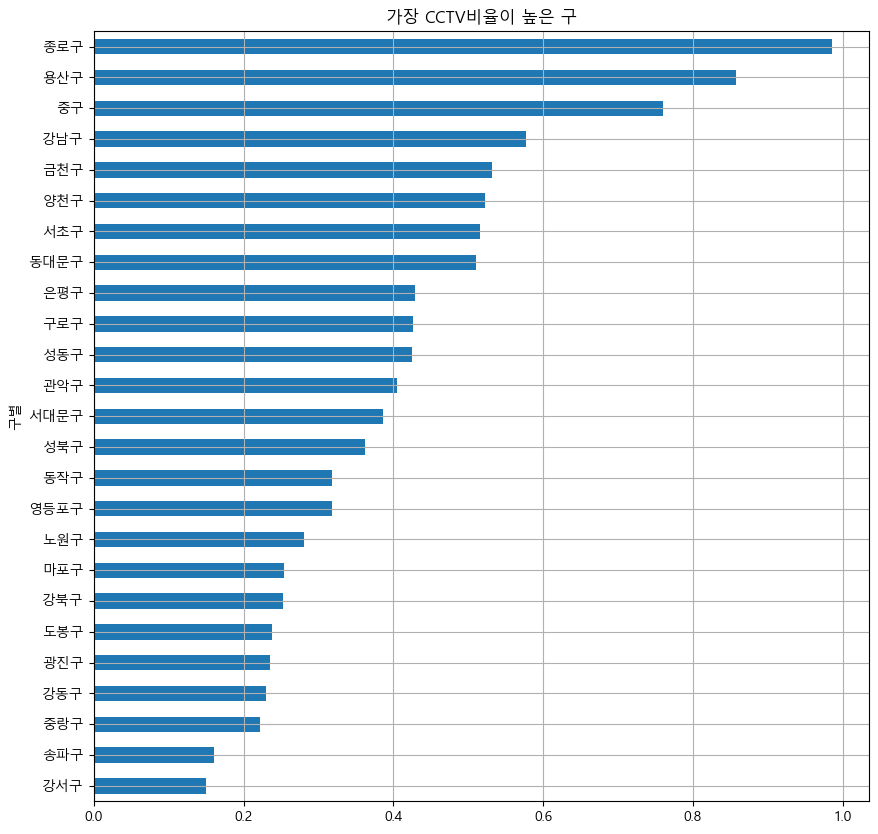

In [55]:
def drawGraph():
    data_result['CCTV비율'].sort_values().plot(
        kind='barh', grid=True,title='가장 CCTV비율이 높은 구', figsize=(10,10));
    
drawGraph() # 정렬, 제목

- 하지만 비율로 확인하면 4위로 내려가고 종로구가 비율이 가장 높은 것으로 나온다.

## 6. 데이터의 경향 표시

In [59]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 인구수와 소계 컬럼으로 scatter plot 그리기

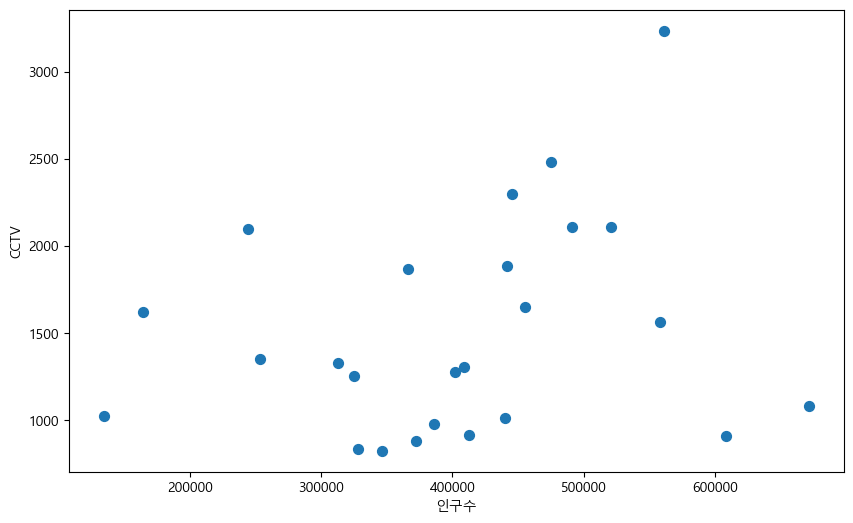

In [60]:
def drawGraph():
    
    plt.figure(figsize=(10,6))
    plt.scatter(data_result['인구수'],data_result['소계'],s=50)
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.show()
    
drawGraph()

#### Numpy를 이용한 1차 직선 만들기
- np.polyfit():직선을 구성하기 위한 계수를 계산
- np.poly1d():polyfit으로 찾은 계수로 파이썬에서 사용할 수있는 함수로 만들어주는 기능

In [64]:
import numpy as np

In [65]:
fp1 = np.polyfit(data_result['인구수'],data_result['소계'], 1)
fp1

array([1.11155868e-03, 1.06515745e+03])

In [66]:
f1 = np.poly1d(fp1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [67]:
f1(400000)

1509.7809252413338

- 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV수는? - 1차 선형회귀로 간단하게 찾아보도록 하자

In [68]:

fx = np.linspace(100000, 700000, 100)

- 경향성을 그리기 위한 x 데이터 생성
- np.linspace(a, b, n) : a부터 b까지 n개의 등간격의 데이터 생성

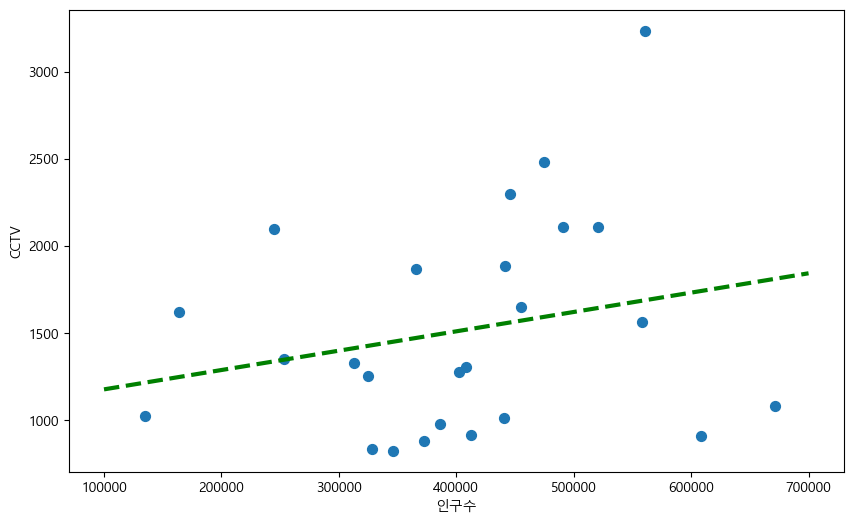

In [69]:
def drawGraph():

    # 그래프 크기 설정
    plt.figure(figsize=(10, 6))

    # 산점도 그리기
    plt.scatter(data_result['인구수'], data_result['소계'], s=50)

    # 회귀선 그리기
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

    # x축 라벨 설정
    plt.xlabel('인구수')

    # y축 라벨 설정
    plt.ylabel('CCTV')

    # 그래프 보여주기
    plt.show()


drawGraph()


### 그래프 다듬기
#### 경향과의 오차 만들기
- 경향(trend)과의 오차를 만들자
- 경향은 f1 함수에 해당 인구를 입력
- f1(data_result['인구수'])

In [70]:
data_result.head(3)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352


In [71]:
data_result['오차'] = data_result['소계'] - f1(data_result['인구수'])

In [72]:
data_result.head(1)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.87122,11.596073,0.57713,1549.200326


In [73]:
# 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산

df_sort_f = data_result.sort_values(by='오차', ascending=False) # 내림차순
df_sort_t = data_result.sort_values(by='오차', ascending=True) # 오름차순


In [74]:
# 경향 대비 CCTV를 많이 가진 구
df_sort_f.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


In [75]:
# 경향 대비 CCTV를 적게 가진 구
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [76]:
from matplotlib.colors import ListedColormap

# matplotlib의 colors 모듈에서 ListedColormap을 import
# ListedColormap은 사용자 정의 색상 맵을 만들기 위한 클래스

# colormap을 사용자 정의로 세팅
color_step = ['#e74c3c', '#2ecc71', '#95a9a6', '#2ecc71', '#3489db', '#3498db']
# color_step은 색상 맵에서 사용할 색상들의 리스트

my_cmap = ListedColormap(color_step)
# my_cmap은 사용자 정의 색상 맵으로, color_step 리스트를 이용하여 생성됨


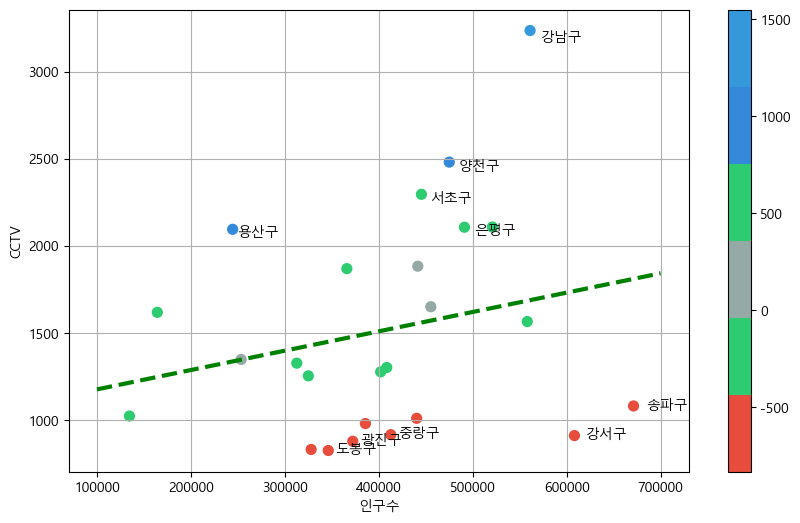

In [77]:
def drawGraph():

    # 그래프 크기 설정
    plt.figure(figsize=(10, 6))

    # 산점도 그리기
    plt.scatter(data_result['인구수'], data_result['소계'],
                s=50, c=data_result['오차'], cmap=my_cmap)

    # 회귀선 그리기
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

    # 상위 5개, 하위 5개 구이름 넣기.
    for n in range(5):
        # 상위 5개
        plt.text(
            df_sort_f['인구수'][n] * 1.02,  # x좌표
            df_sort_f['소계'][n] * 0.98,  # y좌표
            df_sort_f.index[n],  # title
            fontsize=10
        )
        # 하위 5개
        plt.text(
            df_sort_t['인구수'][n] * 1.02,
            df_sort_t['소계'][n] * 0.98,
            df_sort_t.index[n],
            fontsize=10,
        )

    # x축, y축 라벨 설정
    plt.xlabel('인구수')
    plt.ylabel('CCTV')

    # 컬러바 추가
    plt.colorbar()

    # 그리드 추가
    plt.grid(True)

    # 그래프 출력
    plt.show()


drawGraph()


In [83]:
df_sort_f.index[0:5],df_sort_t.index[0:5]

(Index(['강남구', '양천구', '용산구', '서초구', '은평구'], dtype='object', name='구별'),
 Index(['강서구', '송파구', '도봉구', '중랑구', '광진구'], dtype='object', name='구별'))

- '강남구', '양천구', '용산구', '서초구', '은평구' 는 인구수 대비 CCTV가 많은 구로 확인이 되고
- '강서구', '송파구', '도봉구', '중랑구', '광진구' 는 인구수 대비 CCTV가 적은 구로 확인이 된다.
- 범죄의 사각지대를 줄이기 위해서는 해당 구별로 CCTV의 수를 적절히 재배치를 할 필요가 있다고 사료된다.

In [85]:
data_result.to_csv('../data/01. CCTV_result.csv', sep=',', encoding='utf-8')